<a href="https://colab.research.google.com/github/Marcin19721205/IntroductionToBigDataWSB/blob/main/Zadanie_Nr3_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PCA

https://rstudio-pubs-static.s3.amazonaws.com/526159_0a436b7468e6421a8403a672dbbe3840.html

zadanie w Python

#punkt b

In [1]:
#Importy
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
#
#Ścieżka do pliku - wewnątrz sample_data w colabie
path = Path("sample_data/mtcars_data.csv")
#
#Wczytaj csv
df = pd.read_csv(path, encoding='utf-8')
#
#Szybki podgląd
print("Kształt danych:", df.shape)
print("Kolumny:", list(df.columns))
print("\nPierwsze 5 wierszy:")
print(df.head())
#
#Wybór kolumn jak w podano w opisie ćwiczenia dla R (1:7,10,11)
cols = ['mpg','cyl','disp','hp','drat','wt','qsec','gear','carb']
#
# sprawdź, czy wszystkie są obecne
missing = [c for c in cols if c not in df.columns]
if missing:
    raise ValueError(f"Brakuje kolumn: {missing}")
#wpisz kopię do X
X = df[cols].copy()
#czy dane numeryczne
#
X = X.apply(pd.to_numeric, errors='coerce')
#
#wypisz
print("\nLiczba braków NaN w kolumnach:")
print(X.isna().sum())
#
print("\nStatystyka opisowa wybranych kolumn:")
print(X.describe())

Kształt danych: (32, 11)
Kolumny: ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

Pierwsze 5 wierszy:
    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2

Liczba braków NaN w kolumnach:
mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
gear    0
carb    0
dtype: int64

Statystyka opisowa wybranych kolumn:
             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.97845

#punkt c

In [2]:
#PCA summary z wartościami procentowymi
#
#Standaryzacja PCA na macierzy korelacji
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#
#PCA
pca = PCA(n_components=X_std.shape[1])
pca.fit(X_std)
#
#Obliczenia
std_dev = np.sqrt(pca.explained_variance_)          # odchylenia standardowe
prop_var = pca.explained_variance_ratio_            # udział wariancji
cum_prop = np.cumsum(prop_var)                      # skumulowany udział
#
#Tabela jak w R::summary(prcomp)
summary_df = pd.DataFrame({
    'Std. dev.': std_dev,
    'Proportion of Variance': prop_var,
    'Cumulative Proportion': cum_prop,
    '% Variance': prop_var * 100,
    '% Cumulative': cum_prop * 100
}, index=[f'PC{i+1}' for i in range(len(prop_var))])
#
print("PCA summary analogicznie do R::summary, z wartościami procentowymi) ===\n")
print(summary_df.round(4))
#
#ładunki - wynikaja z opisu PCA w Python
loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)
print("\n=== Ładunki dla PCA")
print(loadings.round(4))


PCA summary analogicznie do R::summary, z wartościami procentowymi) ===

     Std. dev.  Proportion of Variance  Cumulative Proportion  % Variance  \
PC1     2.4163                  0.6284                 0.6284     62.8438   
PC2     1.4660                  0.2313                 0.8598     23.1344   
PC3     0.7214                  0.0560                 0.9158      5.6024   
PC4     0.5230                  0.0294                 0.9453      2.9448   
PC5     0.4348                  0.0204                 0.9656      2.0351   
PC6     0.3575                  0.0138                 0.9794      1.3755   
PC7     0.3293                  0.0117                 0.9910      1.1674   
PC8     0.2458                  0.0065                 0.9975      0.6502   
PC9     0.1513                  0.0025                 1.0000      0.2466   

     % Cumulative  
PC1       62.8438  
PC2       85.9782  
PC3       91.5806  
PC4       94.5254  
PC5       96.5605  
PC6       97.9359  
PC7       99.103

Wykres własnych wartości (odpowiednik fviz_eig)

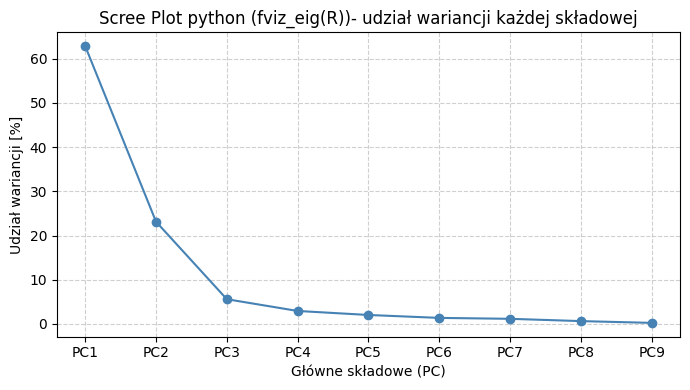

In [3]:
# dane do wykresu - udział wariancji każdego PC
pc_numbers = [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))]
var_percent = pca.explained_variance_ratio_ * 100

plt.figure(figsize=(7,4))
plt.plot(pc_numbers, var_percent, marker='o', linestyle='-', color='steelblue')
plt.title("Scree Plot python (fviz_eig(R))- udział wariancji każdej składowej")
plt.xlabel("Główne składowe (PC)")
plt.ylabel("Udział wariancji [%]")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


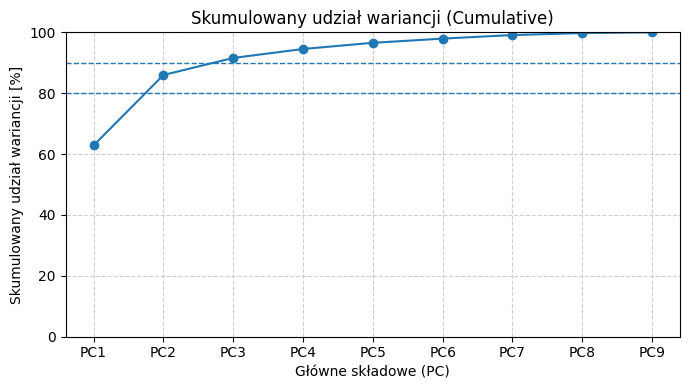

In [4]:
# procenty wariancji i ich kumulacja
var_percent = pca.explained_variance_ratio_ * 100
cum_percent = np.cumsum(var_percent)
pc_labels = [f'PC{i+1}' for i in range(len(var_percent))]
#
plt.figure(figsize=(7,4))
plt.plot(pc_labels, cum_percent, marker='o', linestyle='-')
plt.ylim(0, 100)
plt.title("Skumulowany udział wariancji (Cumulative)")
plt.xlabel("Główne składowe (PC)")
plt.ylabel("Skumulowany udział wariancji [%]")
plt.axhline(80, linestyle='--', linewidth=1)  # próg 80%
plt.axhline(90, linestyle='--', linewidth=1)  # próg 90%
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Wykres obserwacji (odpowiednik fviz_pca_ind

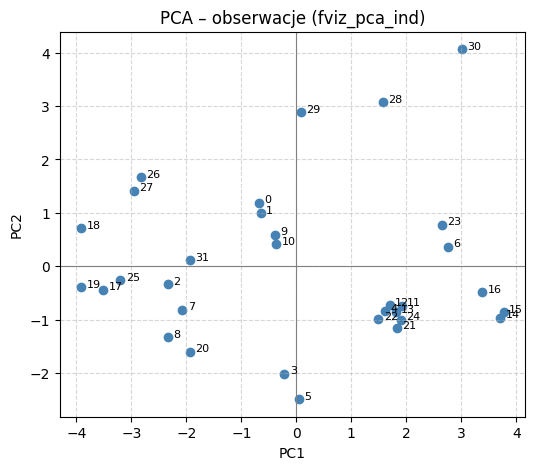

In [5]:
scores = pca.transform(X_std)
#
plt.figure(figsize=(6,5))
plt.scatter(scores[:,0], scores[:,1], color='steelblue')
for i, label in enumerate(df.index):
    plt.text(scores[i,0]+0.1, scores[i,1], label, fontsize=8)
plt.axhline(0, color='gray', lw=0.8)
plt.axvline(0, color='gray', lw=0.8)
plt.title("PCA – obserwacje (fviz_pca_ind)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [6]:
#Wyniki PCA dla PC1 i PC2
scores = pca.transform(X_std)
scores_df = pd.DataFrame(scores[:, :2], columns=['PC1', 'PC2'], index=df.index)
#
#Wykres
fig = px.scatter(
    scores_df,
    x='PC1',
    y='PC2',
    text=scores_df.index,
    title="PCA – obserwacje (odpowiednik fviz_pca_ind)",
    hover_data={'PC1': ':.2f', 'PC2': ':.2f'},
)
#
#styl wykresu
fig.update_traces(
    marker=dict(size=10, color='steelblue', opacity=0.7),
    textposition='top center'
)
fig.update_layout(
    xaxis_title="PC1",
    yaxis_title="PC2",
    template='plotly_white',
    width=700,
    height=500
)
fig.add_hline(y=0, line_dash='dash', line_color='gray')
fig.add_vline(x=0, line_dash='dash', line_color='gray')

fig.show()


Wykres zmiennych (odpowiednik fviz_pca_var)

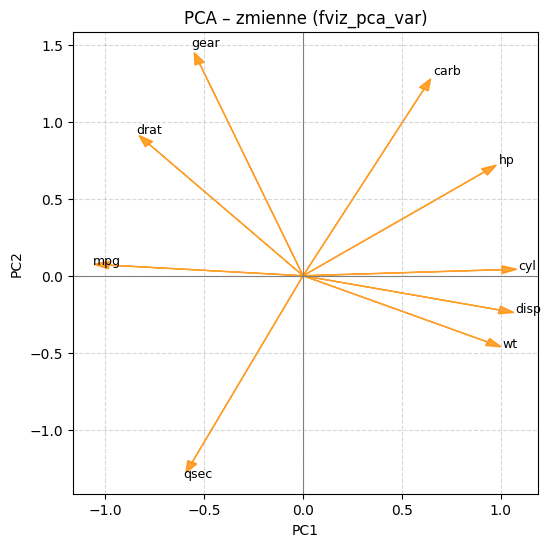

In [7]:
loadings = pca.components_.T
plt.figure(figsize=(6,6))
for i, var in enumerate(X.columns):
    plt.arrow(0, 0, loadings[i,0]*2.5, loadings[i,1]*2.5,
              color='darkorange', alpha=0.8, head_width=0.05)
    plt.text(loadings[i,0]*2.7, loadings[i,1]*2.7, var, fontsize=9, color='black')
plt.axhline(0, color='gray', lw=0.8)
plt.axvline(0, color='gray', lw=0.8)
plt.title("PCA – zmienne (fviz_pca_var)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [8]:

#ładunki (loadings)
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings[:, :2], columns=['PC1', 'PC2'], index=X.columns)
#
#Dane okręgu o promieniu r=1, aby oszacować ładunek
theta = np.linspace(0, 2*np.pi, 200)
circle_x = np.cos(theta)
circle_y = np.sin(theta)
#
#Utwórz wyjkres
fig = go.Figure()
#
# okrąg
fig.add_trace(go.Scatter(
    x=circle_x, y=circle_y,
    mode='lines',
    line=dict(color='lightgray', dash='dot'),
    name='r=1'
))
#
# osie
fig.add_shape(type="line", x0=-1.1, x1=1.1, y0=0, y1=0,
              line=dict(color="gray", width=1))
fig.add_shape(type="line", x0=0, x1=0, y0=-1.1, y1=1.1,
              line=dict(color="gray", width=1))
#
# wektory zmiennych
for var in loadings_df.index:
    fig.add_trace(go.Scatter(
        x=[0, loadings_df.loc[var, 'PC1']],
        y=[0, loadings_df.loc[var, 'PC2']],
        mode='lines+text',
        line=dict(color='darkorange', width=2),
        text=[None, var],
        textposition='top center',
        hovertext=f"{var}: PC1={loadings_df.loc[var,'PC1']:.3f}, PC2={loadings_df.loc[var,'PC2']:.3f}",
        hoverinfo='text'
    ))
#
#Styl
fig.update_layout(
    title="PCA – zmienne (okrąg korelacji, interaktywny fviz_pca_var)",
    xaxis=dict(title="PC1", range=[-1.2, 1.2], zeroline=False),
    yaxis=dict(title="PC2", range=[-1.2, 1.2], zeroline=False),
    width=650, height=650,
    template="plotly_white",
    showlegend=False
)

fig.show()


Biplot (odpowiednik fviz_pca_biplot / ggbiplot / biplot)

In [11]:
#Dane do biplotu
scores = pca.transform(X_std)[:, :2]          # PC1, PC2 dla obserwacji
loadings = pca.components_.T[:, :2]           # ładunki (zmienne) dla PC1, PC2
obs_labels = X.index.tolist()
var_labels = X.columns.tolist()

#Normalizacja, żeby punkty i wektory dobrze współistniały na jednym wykresie
#Skaluje scores do [-1, 1] (jak klasyczny biplot w okręgu korelacji)
max_abs_scores = np.abs(scores).max()
scores_scaled = scores / max_abs_scores * 0.95  # lekkie „ścięcie”, by zmieścić się w r=1
#
#Okrąg korelacji r=1 (opcjonalnie, ale bardzo pomaga w interpretacji)
theta = np.linspace(0, 2*np.pi, 200)
circle_x = np.cos(theta)
circle_y = np.sin(theta)
#
#Procenty wariancji (do „podsumy”)
var_percent = pca.explained_variance_ratio_ * 100
pc1_pct = var_percent[0]
pc2_pct = var_percent[1]
cum_pct = pc1_pct + pc2_pct
##
#Rysunek
fig = go.Figure()
#
# — okrąg
fig.add_trace(go.Scatter(
    x=circle_x, y=circle_y, mode='lines',
    line=dict(color='lightgray', dash='dot'),
    name='r=1'
))
#
# — osie
fig.add_shape(type="line", x0=-1.1, x1=1.1, y0=0, y1=0,
              line=dict(color="gray", width=1))
fig.add_shape(type="line", x0=0, x1=0, y0=-1.1, y1=1.1,
              line=dict(color="gray", width=1))
#
# — punkty (obserwacje)
fig.add_trace(go.Scatter(
    x=scores_scaled[:, 0], y=scores_scaled[:, 1],
    mode='markers+text',
    text=obs_labels, textposition='top center',
    marker=dict(size=9, opacity=0.8),
    name='Obserwacje',
    hovertemplate='Obiekt: %{text}<br>PC1: %{x:.3f}<br>PC2: %{y:.3f}<extra></extra>'
))
#
# — wektory (zmienne)
for i, var in enumerate(var_labels):
    fig.add_trace(go.Scatter(
        x=[0, loadings[i, 0]], y=[0, loadings[i, 1]],
        mode='lines+text',
        line=dict(width=2),
        text=[None, var],
        textposition='top center',
        name=f'→ {var}',
        hovertemplate=(f'Zmienna: {var}'
                       f'<br>PC1: {loadings[i,0]:.3f}'
                       f'<br>PC2: {loadings[i,1]:.3f}<extra></extra>')
    ))
#
# — „podsumа” (annotation) z % wariancji
fig.add_annotation(
    x=-1.1, y=1.15, xref='x', yref='y', showarrow=False,
    text=(f"<b>Podsumowanie</b>: PC1 = {pc1_pct:.1f}% | "
          f"PC2 = {pc2_pct:.1f}% | "
          f"Kumulacja = {cum_pct:.1f}%"),
    font=dict(size=12)
)

#stylizacja i zakresy
fig.update_layout(
    title="Biplot (odpowiednik fviz_pca_biplot/ggbiplot)",
    xaxis=dict(title=f"PC1 ({pc1_pct:.1f}%)", range=[-1.2, 1.2], zeroline=False),
    yaxis=dict(title=f"PC2 ({pc2_pct:.1f}%)", range=[-1.2, 1.2], zeroline=False),
    width=800, height=700,
    template='plotly_white',
    showlegend=False
)
#
fig.show()


Objaśnienie

Punkty

Każdy punkt to jedna obserwacja — samochód z zestawu mtcars (który - widać interaktywnie)

Położenie punktu w układzie (PC1, PC2) pokazuje projekcję tej obserwacji na dwie główne składowe.

Podobne punkty → podobny profil cech.

np. auta po prawej stronie mają dużą pojemność silnika (disp), więcej cylindrów (cyl), większą moc (hp) – bo tam skierowane są te wektory.

po lewej stronie są samochody oszczędne (mpg wysokie, drat wysokie).

Odległość od środka (0,0) mówi, jak dobrze dany punkt jest reprezentowany przez PC1 i PC2 — im dalej od środka, tym większy udział w wyjaśnionej wariancji.

Strzałki (wektory zmiennych)

Każda strzałka odpowiada jednej zmiennej oryginalnej (np. hp, wt, mpg, gear).

Kierunek strzałki pokazuje korelację zmiennej z osiami PC1 i PC2.

Długość strzałki = siła korelacji (ładunek) między zmienną a przestrzenią PC1–PC2:

długie strzałki → zmienne dobrze reprezentowane przez pierwsze dwie składowe,

krótkie → zmienne mniej związane z PC1/PC2 (mają istotny udział w dalszych składowych PC3, PC4…).

Kąty między strzałkami

Interpretujesz je jak kąty między wektorami korelacji:

mały kąt (0–30°) → zmienne silnie dodatnio skorelowane
np. disp, hp i wt są prawie równoległe → rosną razem;

kąt ok. 90° → brak korelacji
np. qsec (czas przyspieszenia) vs hp;

kąt ok. 180° (przeciwny kierunek) → silna ujemna korelacja
np. mpg jest przeciwny do disp i hp → im większa moc i pojemność, tym mniejsze mpg.

Okrąg o promieniu r = 1

To tzw. okrąg korelacji:

reprezentuje maksymalną możliwą korelację (|r| = 1).

zmienne, których końce strzałek leżą blisko okręgu, są dobrze odwzorowane przez PC1 i PC2;

jeśli końcówka wektora jest daleko od okręgu, to ta zmienna ma istotny wkład w dalsze komponenty (PC3+).

#punkt e

na ile wymiarów należy zrzutować przestrzeń obserwacji, by wyjaśnić co najmniej 96%
zmienności ?   

In [13]:
# udział wariancji dla każdej składowej
var_ratio = pca.explained_variance_ratio_
cum_var = np.cumsum(var_ratio) * 100  # w %
# znajdź minimalną liczbę PC potrzebnych do >=96%
num_pc = np.argmax(cum_var >= 96) + 1
#
print("Udział wariancji każdej składowej [%]:")
print(np.round(var_ratio * 100, 2))
print("\nSkumulowany udział wariancji [%]:")
print(np.round(cum_var, 2))
print(f"\n96% zmienności wyjaśnia {num_pc} składowych głównych.")


Udział wariancji każdej składowej [%]:
[62.84 23.13  5.6   2.94  2.04  1.38  1.17  0.65  0.25]

Skumulowany udział wariancji [%]:
[ 62.84  85.98  91.58  94.53  96.56  97.94  99.1   99.75 100.  ]

96% zmienności wyjaśnia 5 składowych głównych.
